# Initial EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('quora.csv')
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
200470,200470,302237,302238,How do they make Starburst taste so juicy?,What are the different grains used to make whi...,0
348870,348870,11163,477481,What are the best questions to ask a girl when...,"When meeting a girl for the first time, what t...",0
383981,383981,213687,515974,How do I transfer songs from the iPad to a com...,How do you transfer songs from an iPad to an i...,0
181804,181804,278423,245605,What is the funniest thing you've seen a stran...,What are some of the funniest things you've seen?,0
310772,310772,434949,434950,How do I stop procrastinating on my homework?,How can I stop procrastinating on my homework ...,1


#### Which Features are Available in Dataset ?

In [3]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [4]:
df.columns.values

array(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'],
      dtype=object)

#### Shape of Data

In [5]:
df.shape

(404290, 6)

In [6]:
print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1])

Number of Rows:  404290
Number of Columns:  6


#### Distribution of Data

In [7]:
# Distribution of Numerical Features
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [8]:
# Distribution of Categorical Features
df.describe(include = ['O'])

,question1,question2
count,404289,404288
unique,290456,299174
top,How do I improve my English speaking?,How can you look at someone's private Instagra...
freq,50,120


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [10]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

#### Number of Unique Values in Each Feature

In [11]:
df.nunique()

id              404290
qid1            290654
qid2            299364
question1       290456
question2       299174
is_duplicate         2
dtype: int64

In [12]:
df.is_duplicate.unique()

array([0, 1], dtype=int64)

#### Count for Each Variable in Dataset

In [13]:
df.count()

id              404290
qid1            404290
qid2            404290
question1       404289
question2       404288
is_duplicate    404290
dtype: int64

#### Number of Null Values in Each Column

In [14]:
# missing values by column-wise
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [15]:
df.isnull().sum().sum()  # Total number of null values

3

#### Number of Duplicated Rows

In [16]:
df.duplicated().sum()

0

#### How many duplicate questions are presnt in dataset ?

In [17]:
duplicate = df['is_duplicate'].value_counts()

In [18]:
duplicate

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [19]:
print('Number of Non Duplicate Questions : ',duplicate[0])
print('Number of Duplicate Questions : ',duplicate[1])

Number of Non Duplicate Questions :  255027
Number of Duplicate Questions :  149263


In [20]:
df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate
159671,159671,249217,249218,What is it with gold digger?,What is gold digger?,1
55465,55465,23967,97777,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?,0
295578,295578,417644,404334,What is the procedure for applying for an IIT ...,Are Nepalese students eligible for the GATE ex...,0


#### How is the correlation between variables ?

In [21]:
df.corr()

,id,qid1,qid2,is_duplicate
id,1.000000,0.629373,0.641993,-0.008784
qid1,0.629373,1.000000,0.700140,-0.247072
qid2,0.641993,0.700140,1.000000,-0.260101
is_duplicate,-0.008784,-0.247072,-0.260101,1.000000


In [22]:
df.corr()['is_duplicate']

id             -0.008784
qid1           -0.247072
qid2           -0.260101
is_duplicate    1.000000
Name: is_duplicate, dtype: float64

#### How is the covariance between variables ?

In [23]:
df.cov()

,id,qid1,qid2,is_duplicate
id,1.362090e+10,1.158738e+10,1.198092e+10,-494.724191
qid1,1.158738e+10,2.488560e+10,1.766103e+10,-18809.373023
qid2,1.198092e+10,1.766103e+10,2.556903e+10,-20071.334458
is_duplicate,-4.947242e+02,-1.880937e+04,-2.007133e+04,0.232891


In [24]:
# Taking Sample of randomly 3000 rows and training model on it
df1 = df.sample(30000)

In [25]:
df1.is_duplicate.value_counts()

0    18970
1    11030
Name: is_duplicate, dtype: int64

In [26]:
print(df1.is_duplicate.value_counts()/df1.is_duplicate.count()*100)

0    63.233333
1    36.766667
Name: is_duplicate, dtype: float64


<AxesSubplot:>

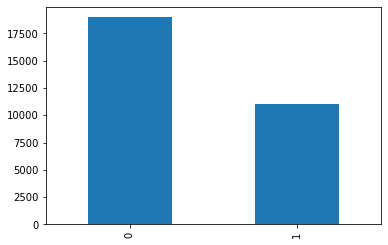

In [27]:
df1['is_duplicate'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='is_duplicate'>

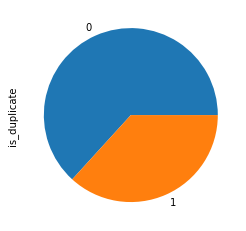

In [28]:
df1.is_duplicate.value_counts().plot(kind = 'pie')

#### How many Repeated Questions are ?

In [29]:
qid = pd.Series(df1['qid1'].tolist() + df1['qid2'].tolist())

In [30]:
print('Number of unique questions :',np.unique(qid).shape[0])

Number of unique questions : 55307


In [31]:
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of questions getting repeated 3445


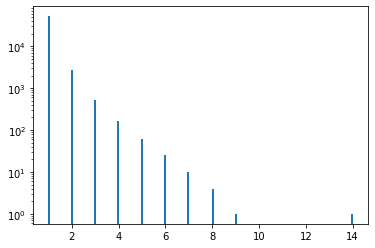

In [32]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Without Applying Pre-Processing

In [33]:
ques_df = df1[['question1','question2']]
ques_df.head(2)

,question1,question2
398305,What do you mean by rave party?,What is rave party?
211615,Why is promiscuity considered bad?,Is it bad for a man to have sex with his wife ...


In [34]:
type(ques_df)

pandas.core.frame.DataFrame

### Applying Bag of Words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer 

In [36]:
# Merging String Texts
a = ques_df['question1'] + ques_df['question2']

In [37]:
type(a)

pandas.core.series.Series

In [38]:
questions= list(ques_df['question1']) + list(ques_df['question2'])

In [39]:
type(questions)

list

In [40]:
cv = CountVectorizer(max_features=3000)

In [41]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) # By splitting row-wise into two arrays 

In [42]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [43]:
temp_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
318466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264332,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
193461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
temp_df['is_duplicate'] = df1['is_duplicate']

In [45]:
temp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
398305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7435

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.732

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.5683333333333334

In [50]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7108333333333333